# Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [2]:
df = pd.read_csv('templates/kaggle/input/collegePlace.csv')
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


# EDA - Exploratory Data Analysis

In [3]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df.tail()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0
2965,23,Male,Civil,0,8,0,0,1


In [5]:
df.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

In [6]:
df.size

23728

In [7]:
df.shape

(2966, 8)

In [8]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [10]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [11]:
df.duplicated().sum()

1829

In [12]:
df.drop(['Gender', 'Stream'], axis=1).skew()

Age                  0.996099
Internships          0.789343
CGPA                 0.006222
Hostel               1.042100
HistoryOfBacklogs    1.563290
PlacedOrNot         -0.211665
dtype: float64

In [13]:
df.drop(['Gender', 'Stream'], axis=1).corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


In [14]:
df.skew()

/var/folders/gb/w7gjdxr17kj0xgq19z4kr96c0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_57330/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Age                  0.996099
Internships          0.789343
CGPA                 0.006222
Hostel               1.042100
HistoryOfBacklogs    1.563290
PlacedOrNot         -0.211665
dtype: float64

In [15]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

# Data Visualization

In [16]:
df['Gender'].value_counts()

Male      2475
Female     491
Name: Gender, dtype: int64

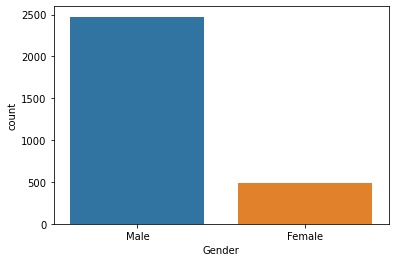

In [17]:
sns.countplot(x='Gender', data=df)
plt.show()

In [18]:
df['Stream'].value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

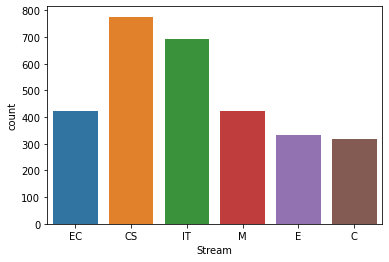

In [20]:
# Changing stream names to categorical types for better visualization
for i in df['Stream']:
    if i == 'Computer Science':
        df['Stream'].replace(i, 'CS', inplace=True)
    elif i == 'Information Technology':
        df['Stream'].replace(i, 'IT', inplace=True)
    elif i == 'Electronics And Communication':
        df['Stream'].replace(i, 'EC', inplace=True)
    elif i == 'Mechanical':
        df['Stream'].replace(i, 'M', inplace=True)
    elif i == 'Electrical':
        df['Stream'].replace(i, 'E', inplace=True)
    elif i == 'Civil':
        df['Stream'].replace(i, 'C', inplace=True)

sns.countplot(x='Stream', data=df)
plt.show()

In [25]:
fig = px.histogram(df, 'Age', color='Gender', title="<b>Average Age wrt Gender</b>")
fig.add_vline(x=df['Age'].mean(), line_width=2, line_dash='dash', line_color='black')
fig.show()

In [37]:
fig = px.histogram(data_frame=df, x='Stream', color='PlacedOrNot', title="<b>Stream Counts - Placed or not</b>", 
                   pattern_shape='PlacedOrNot', pattern_shape_sequence=['+', 'x'])
fig.show()
# Computer Science student placed more compared to other streams

In [38]:
fig = px.histogram(data_frame=df, x='Gender', color='PlacedOrNot', title="<b>Gender Counts - Placed or not</b>", 
                   pattern_shape='PlacedOrNot', pattern_shape_sequence=['+', 'x'])
fig.show()

In [41]:
df1 = df.groupby('Stream').agg({'Age': 'mean', 
                                'Internships': 'sum', 
                                'CGPA': 'mean', 
                                'PlacedOrNot': 'sum'})
df1

,Age,Internships,CGPA,PlacedOrNot
Stream,,,,
C,21.441640,173,7.094637,146
CS,21.559278,676,7.039948,452
E,21.299401,203,7.080838,181
EC,21.410377,306,7.125000,251
IT,21.539797,509,7.073806,409
M,21.518868,220,7.063679,200


In [43]:
fig = px.bar(data_frame=df1, barmode='group', title="<b>Stream wise Analyzing</b>")
fig.show()
# In Computer Science most of the students are placed

In [45]:
fig = px.histogram(data_frame=df[df['Internships'] == 0], x='PlacedOrNot', color='PlacedOrNot', title="<b>No Internships - Placed or not</b>")
fig.update_layout(bargap=0.2)
fig.show()

## More Visualization of numerical columns 

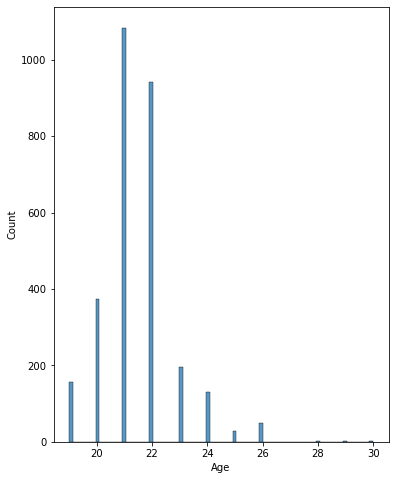

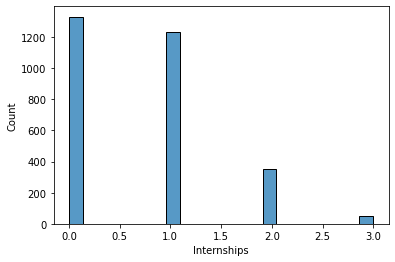

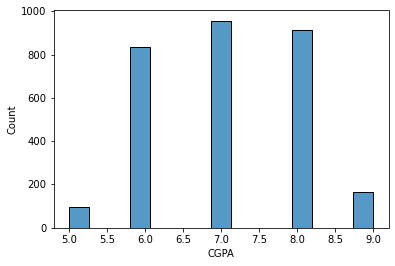

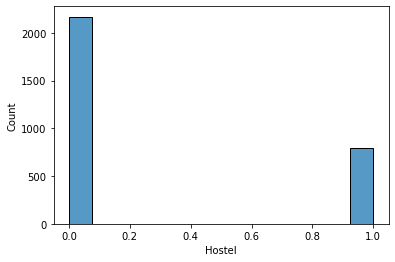

In [46]:
plt.figure(figsize=(6, 8))
x = df.drop(['Gender', 'Stream'], axis=1)
for i in x.columns[:4]:
    sns.histplot(x[i], kde=False)
    plt.show()

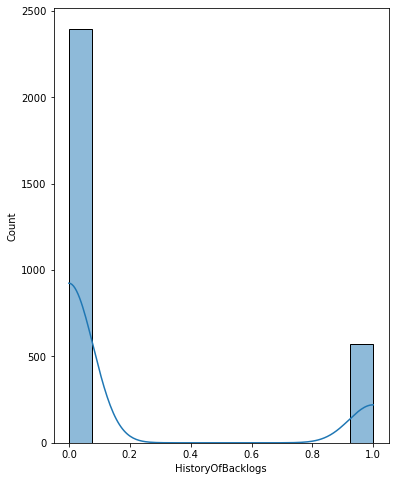

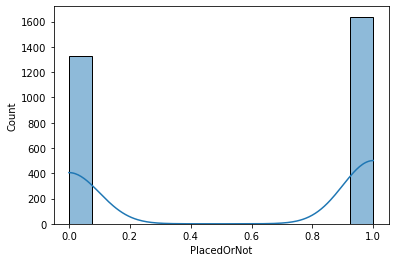

In [48]:
plt.figure(figsize=(6, 8))
x = df.drop(['Gender', 'Stream'], axis=1)
for i in x.columns[4:]:
    sns.histplot(x[i], kde=True)
    plt.show()

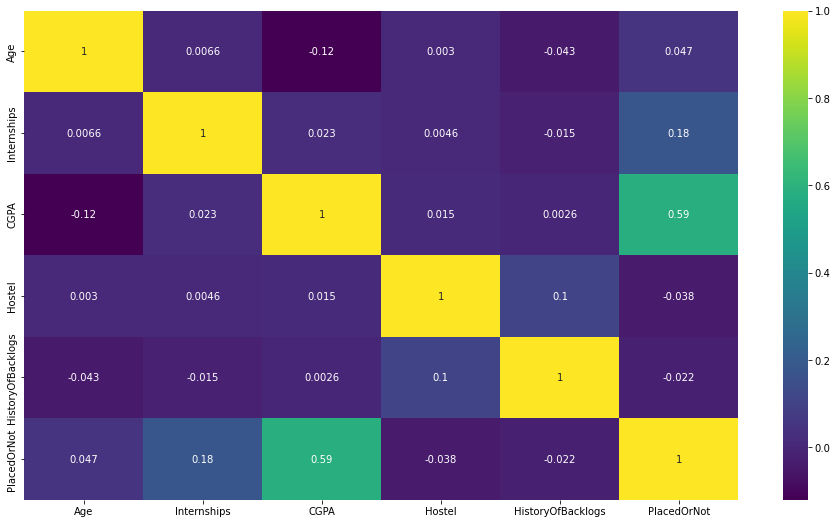

In [49]:
# Heatmap - correlation
plt.figure(figsize=(16, 9))
ax = sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

## Checking Outliers via Bocplot

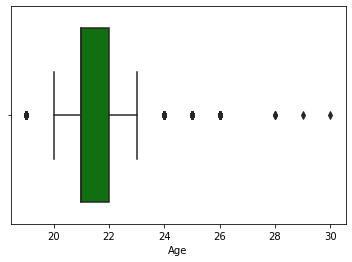

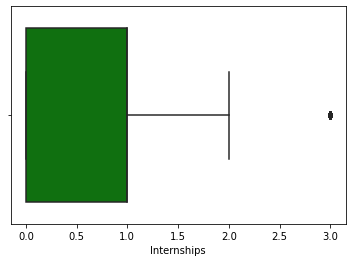

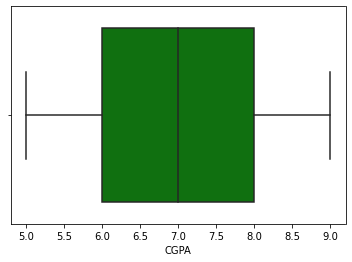

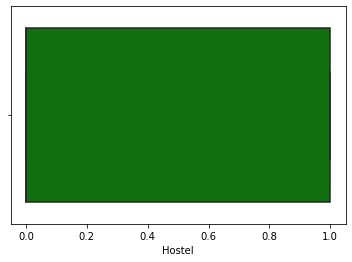

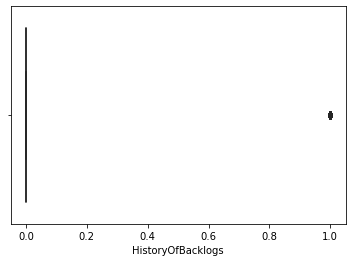

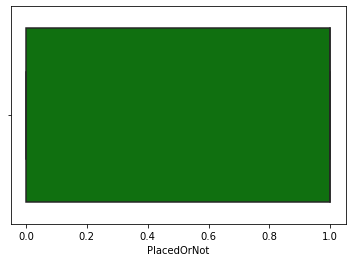

In [50]:
x = df.drop(['Gender', 'Stream'], axis=1)
for i in x.columns:
    sns.boxplot(x=i, data=x, color='green')
    plt.xlabel(i)
    plt.show()

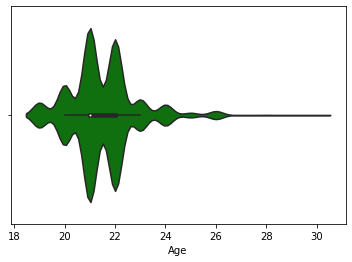

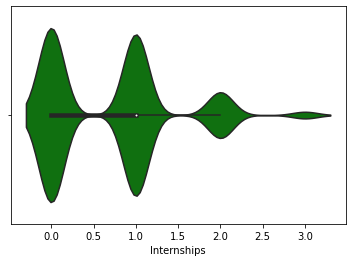

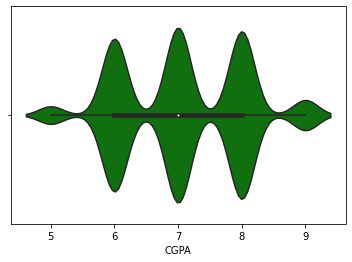

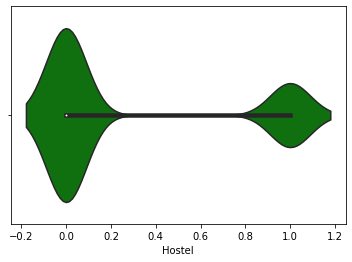

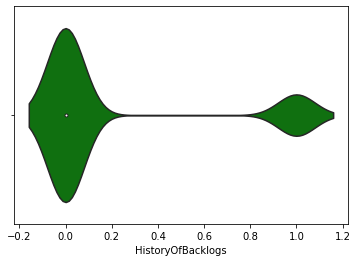

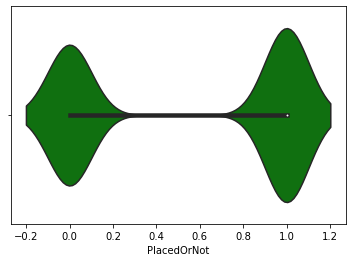

In [51]:
# Violin plot
x = df.drop(['Gender', 'Stream'], axis=1)
for i in x.columns:
    sns.violinplot(x=i, data=x, color='green')
    plt.xlabel(i)
    plt.show()

In [55]:
def cnt_outlier(data, col):
    q1 = data[col].quantile(0.25, interpolation='nearest')
    q2 = data[col].quantile(0.5, interpolation='nearest')
    q3 = data[col].quantile(0.75, interpolation='nearest')
    q4 = data[col].quantile(1, interpolation='nearest')
    IQR = q3 - q1
    global LLP
    global ULP
    LLP = q1 - 1.5*IQR
    ULP = q3 + 1.5*IQR
    if data[col].min() > LLP and data[col].max() < ULP:
        print(i, 'has no outliers.')
    else:
        print(i, 'has outliers.')
        x = data[data[col] < LLP][col].size
        y = data[data[col] > ULP][col].size
        a.append(i)
        print('Count of outliers:', (x+y))
global a
a = []
for i in x.columns:
    cnt_outlier(df, i)

Age has outliers.
Count of outliers: 371
Internships has outliers.
Count of outliers: 51
CGPA has no outliers.
Hostel has no outliers.
HistoryOfBacklogs has outliers.
Count of outliers: 570
PlacedOrNot has no outliers.


# Linear Regression

In [65]:
# Splitting the train and test data
x_train, x_test, y_train, y_test = train_test_split(df[['Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']], 
                                                    df['PlacedOrNot'], test_size=0.3, random_state=30)

# Predicting using Linear Regression

In [66]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [72]:
pred_lr = lr.predict(x_test)
for i in range(len(pred_lr)):
    if pred_lr[i] >= 0.5:
        pred_lr[i] = 1
    else:
        pred_lr[i] = 0
pred_lr

array([0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0.

# Prediction using KNN

In [70]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [73]:
pred_knn = knn.predict(x_test)
pred_knn

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,

In [74]:
p = pd.DataFrame(data=[pred_lr, y_test])
d = p.transpose()
d.rename(columns={0: 'pred_lr', 1: 'y_test'}, inplace=True)
d

,pred_lr,y_test
0,0.0,0.0
1,1.0,1.0
2,1.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
885,1.0,1.0
886,0.0,0.0
887,1.0,0.0
888,1.0,1.0


In [75]:
p = pd.DataFrame(data=[pred_knn, y_test])
d = p.transpose()
d.rename(columns={0: 'pred_knn', 1: 'y_test'}, inplace=True)
d

,pred_knn,y_test
0,0,0
1,1,1
2,0,0
3,1,0
4,1,1
...,...,...
885,1,1
886,0,0
887,0,0
888,1,1


# Classification Report - Confusion matrix

In [79]:
print('Linear Regression: \n', classification_report(y_test, pred_lr))
print('\n\nKNN: \n', classification_report(y_test, pred_knn))

Linear Regression: 
               precision    recall  f1-score   support

           0       0.74      0.77      0.75       401
           1       0.80      0.78      0.79       489

    accuracy                           0.78       890
   macro avg       0.77      0.77      0.77       890
weighted avg       0.78      0.78      0.78       890



KNN: 
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       401
           1       0.84      0.74      0.78       489

    accuracy                           0.78       890
   macro avg       0.78      0.78      0.78       890
weighted avg       0.79      0.78      0.78       890



In [80]:
import pickle
pickle.dump(knn, open('templates/knn-model.pkl', 'wb'))
pickle.dump(lr, open('templates/model.pkl', 'wb'))